**EDA, Data Cleaning and Feature Engineering**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import os
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from subprocess import check_output
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [6]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000,1459.000,1232.000,1459.000,1459.000,1459.000,1459.000,1459.000,1444.000,1458.000,...,1458.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000
mean,2190.000,57.378,68.580,9819.161,6.079,5.554,1971.358,1983.663,100.709,439.204,...,472.769,93.175,48.314,24.243,1.794,17.064,1.744,58.168,6.104,2007.770
std,421.321,42.747,22.377,4955.517,1.437,1.114,30.390,21.130,177.626,455.268,...,217.049,127.745,68.883,67.228,20.208,56.610,30.492,630.807,2.722,1.302
min,1461.000,20.000,21.000,1470.000,1.000,1.000,1879.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000
25%,1825.500,20.000,58.000,7391.000,5.000,5.000,1953.000,1963.000,0.000,0.000,...,318.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2007.000
50%,2190.000,50.000,67.000,9399.000,6.000,5.000,1973.000,1992.000,0.000,350.500,...,480.000,0.000,28.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000
75%,2554.500,70.000,80.000,11517.500,7.000,6.000,2001.000,2004.000,164.000,753.500,...,576.000,168.000,72.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000
max,2919.000,190.000,200.000,56600.000,10.000,9.000,2010.000,2010.000,1290.000,4010.000,...,1488.000,1424.000,742.000,1012.000,360.000,576.000,800.000,17000.000,12.000,2010.000


In [7]:
train_ID = train['Id']
test_ID = test['Id']
#Dropping the 'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

Visualizing the dataset during the EDA process can be very beneficial. For instance, histograms make analyzing the distribution of the data an easier task; boxplots are great for identifying outliers; scatterplots are very useful when it comes to checking the correlations between variables. Another helpful visualization tool to check the correlations between dependent and independent variables is heatmap. But first let's explore the target variable (SalePrice)

Text(0.5, 0, 'GrLivArea')

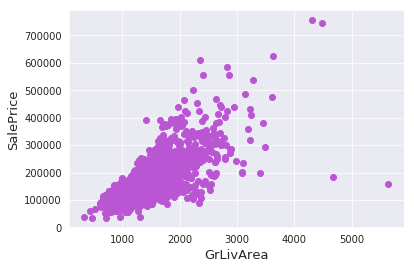

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], c='mediumorchid')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

Text(0.5, 0, 'GrLivArea')

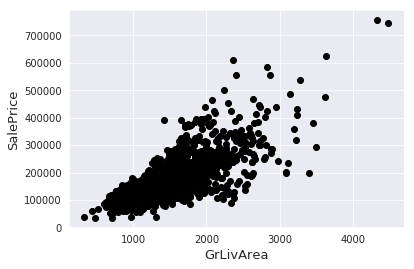

In [11]:
#Removing extreme outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#Checking the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'], c='black')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)


 mu = 12.02 and sigma = 0.40



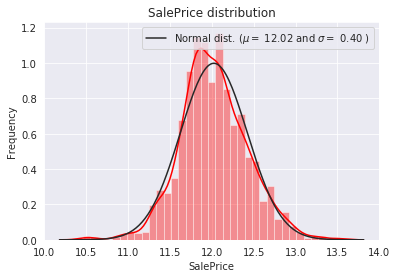

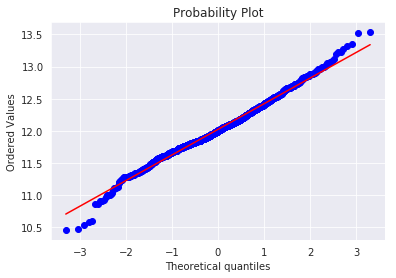

In [12]:
#Using the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
#Checking the new distribution 
sns.distplot(train['SalePrice'], color='red', fit=norm);
#Getting the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

The distribution of the target variable was right-skewed, so we applied natural log to make it normally distributed

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)

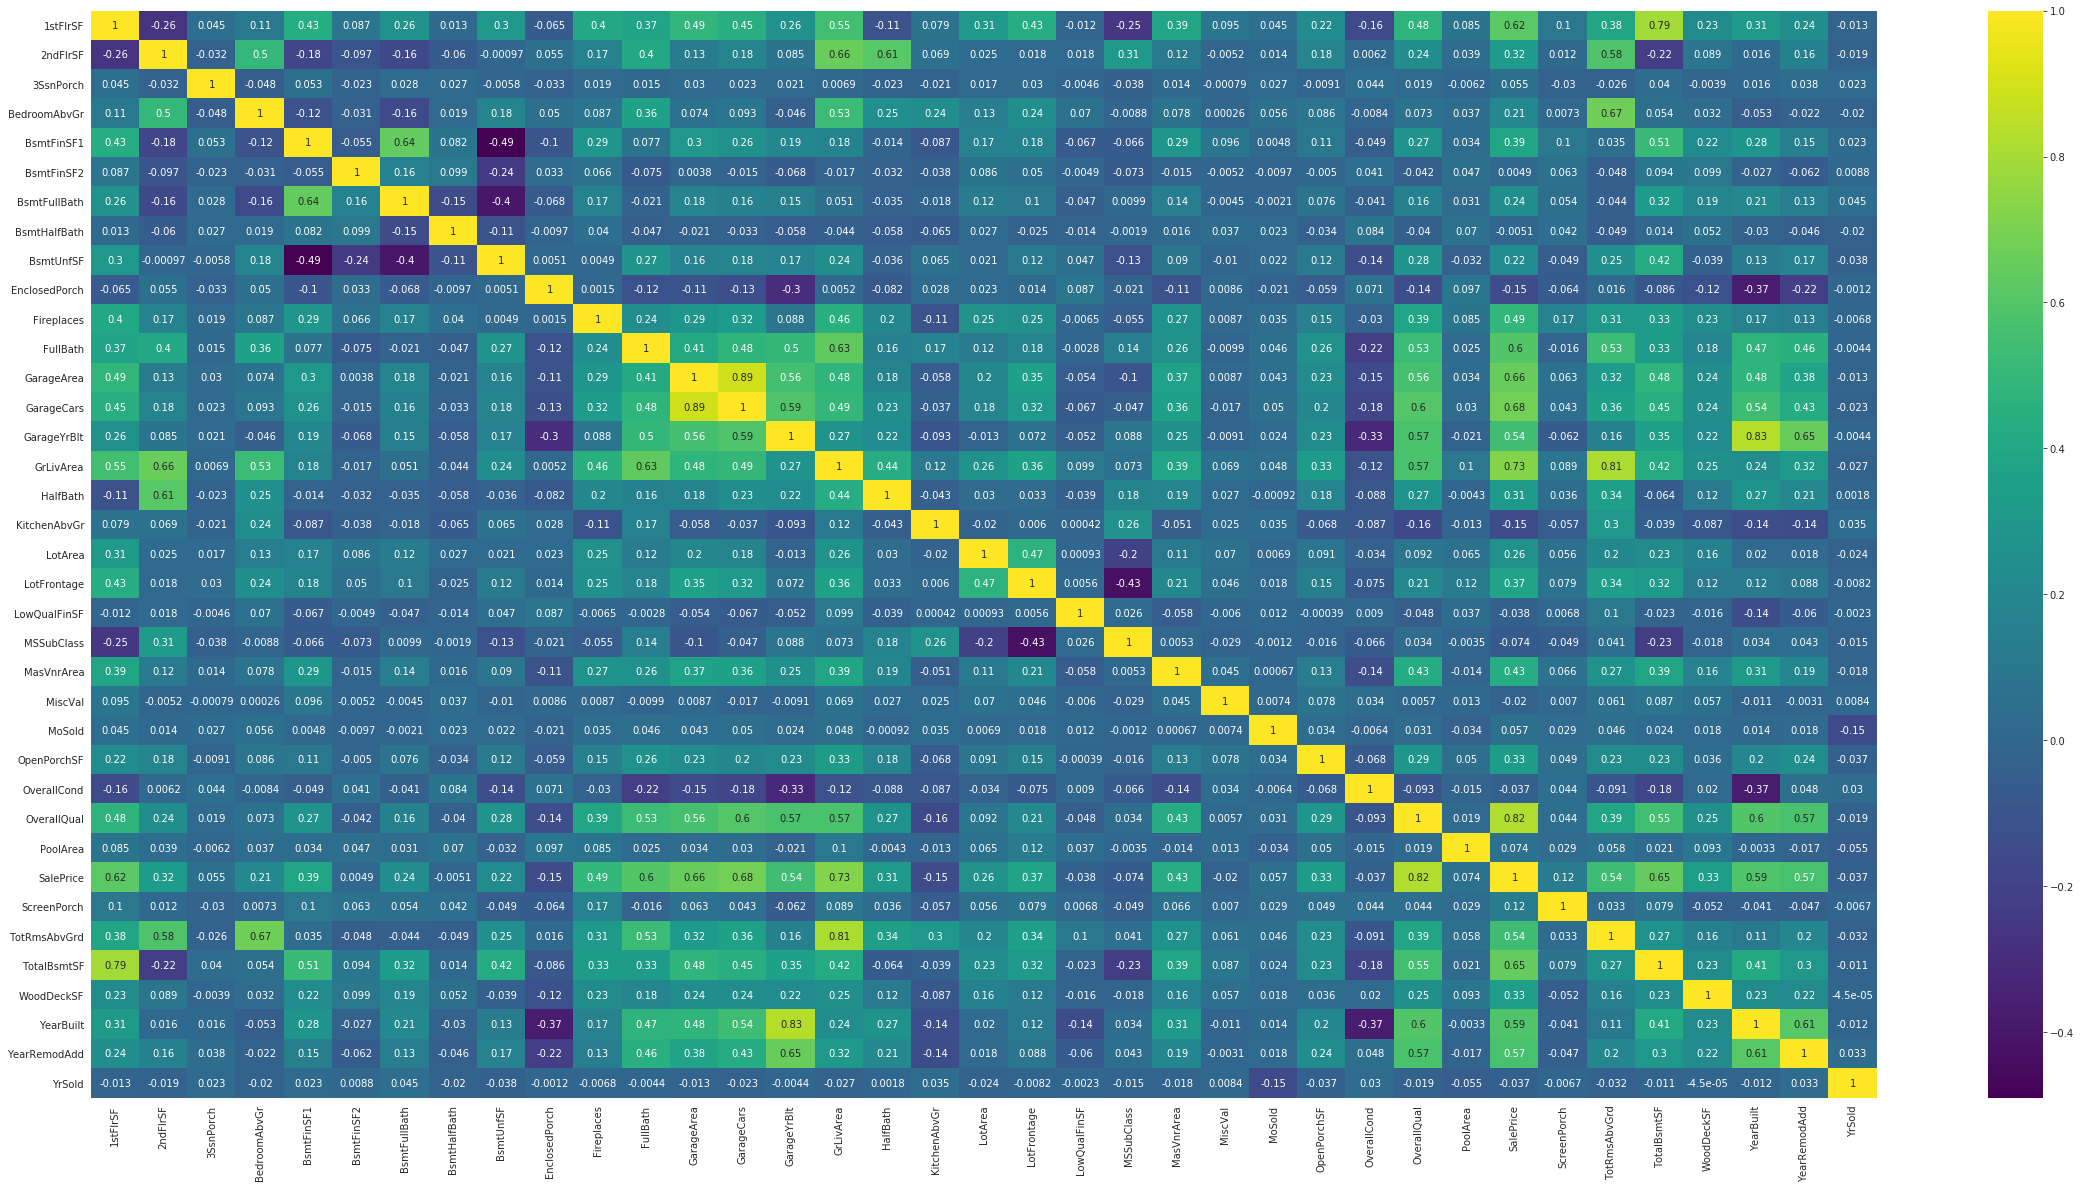

In [14]:
plt.figure(figsize=[40,20])
sns.heatmap(data.corr(), cmap='viridis', annot=True)

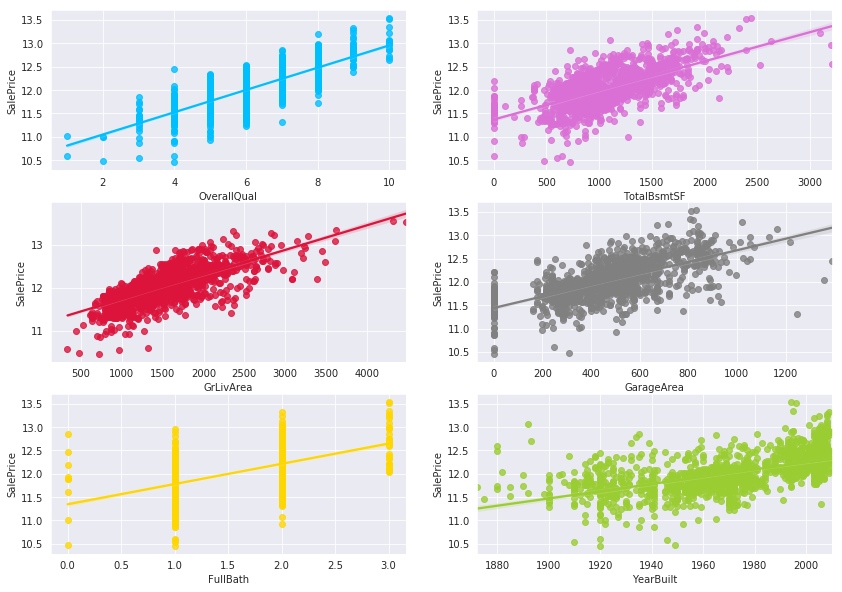

In [15]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
sns.regplot(x='OverallQual', y = 'SalePrice', color='deepskyblue', data = data, scatter = True,
            fit_reg=True, ax=ax1)
sns.regplot(x='TotalBsmtSF', y = 'SalePrice', color='orchid', data = data, scatter= True,
            fit_reg=True, ax=ax2)
sns.regplot(x='GrLivArea', y = 'SalePrice', color='crimson', data = data, scatter= True,
            fit_reg=True, ax=ax3)
sns.regplot(x='GarageArea', y = 'SalePrice', color='gray', data = data, scatter= True,
            fit_reg=True, ax=ax4)
sns.regplot(x='FullBath', y = 'SalePrice', color='gold', data = data, scatter= True,
            fit_reg=True, ax=ax5)
sns.regplot(x='YearBuilt', y = 'SalePrice', color='yellowgreen', data = data, scatter= True,
            fit_reg=True, ax=ax6)

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 'GarageCars' and 'GarageArea' are strongly correlated variables. 'TotalBsmtSF' and '1stFlrSF' also seem to have high correlation between them just like 'TotRmsAbvGrd', 'GrLivArea' and '2ndFlrSF

Exploratory Data Analysis (EDA) and Data Cleaning are two essential steps before we start to develop Machine Learning Models. One important part in the EDA is to inspect missing values, study if there are any patterns in the missing values, and make a decision about how to deal with them accordingly. The first thing here is to have a general idea of the total and percentage of missing data in each column:

In [16]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
SalePrice,50.017
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451


There are lots of ways to deal with missing values. We can drop the columns with too many missing values or impute them instead. I don't really like to drop any columns since we loose data that way, so we'll impute missing values and maybe drop just one unnecessary column

In [17]:
data["PoolQC"] = data["PoolQC"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data = data.drop(['Utilities'], axis=1)
data["Functional"] = data["Functional"].fillna("Typ")
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [18]:
#Transforming some features into categorical
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [19]:
#Transforming features into numeric
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))        
print('Shape data: {}'.format(data.shape))

Shape data: (2917, 79)


In [20]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
#Checking the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [21]:
data.kurt()

1stFlrSF          5.075
2ndFlrSF         -0.424
3SsnPorch       149.305
Alley            11.682
BedroomAbvGr      1.938
BsmtCond          6.740
BsmtExposure     -0.229
BsmtFinSF1        1.427
BsmtFinSF2       18.829
BsmtFinType1     -1.510
BsmtFinType2      8.493
BsmtFullBath     -0.745
BsmtHalfBath     14.848
BsmtQual         -0.763
BsmtUnfSF         0.403
CentralAir        9.974
EnclosedPorch    28.358
ExterCond         5.087
ExterQual         3.714
Fence             2.729
FireplaceQu      -0.128
Fireplaces        0.043
FullBath         -0.542
Functional       16.246
GarageArea        0.865
GarageCars        0.237
GarageCond       12.536
GarageFinish     -1.202
GarageQual        8.364
GarageYrBlt      13.329
GrLivArea         2.457
HalfBath         -1.030
HeatingQC        -1.514
KitchenAbvGr     19.761
KitchenQual       1.789
LandSlope        26.554
LotArea         275.640
LotFrontage       8.526
LotShape         -1.588
LowQualFinSF    174.810
MSSubClass       -0.539
MasVnrArea      

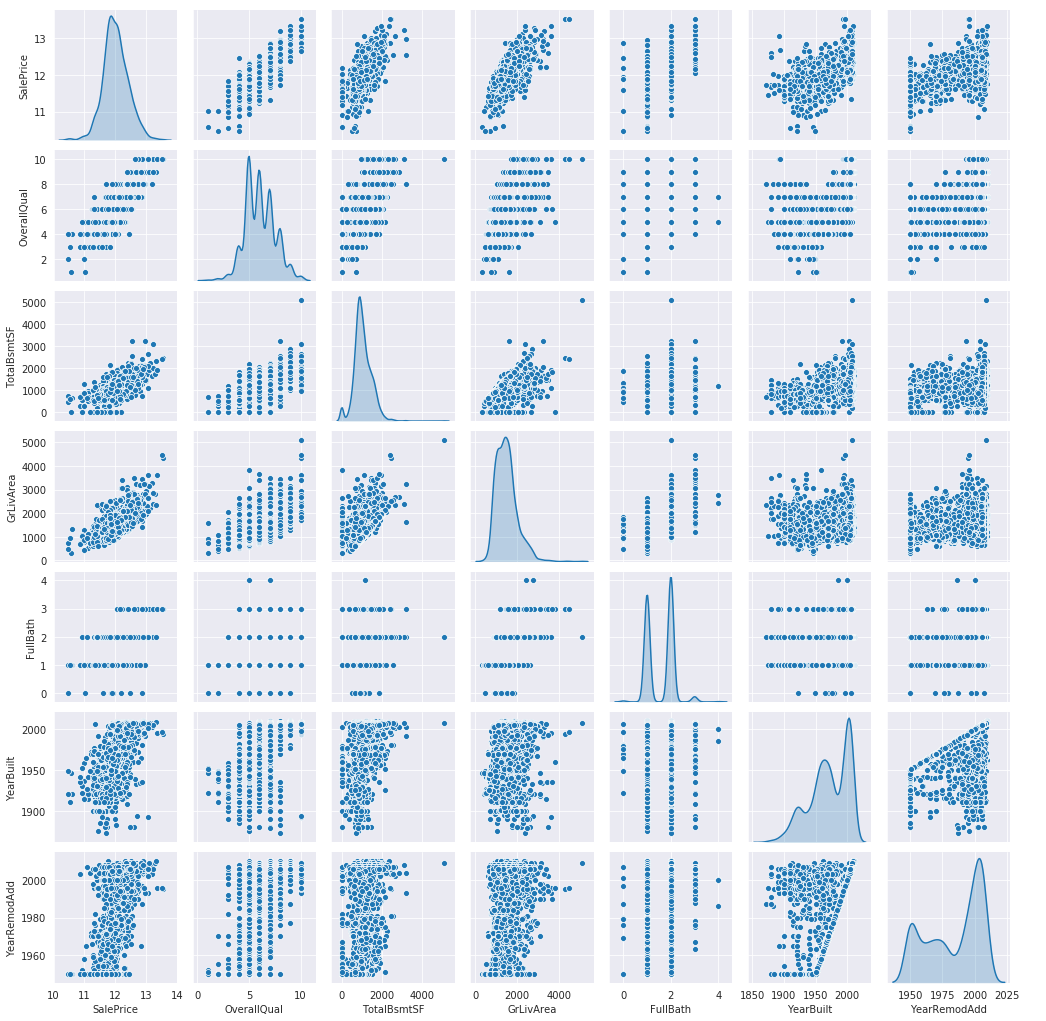

In [22]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea', 'FullBath',
           'YearBuilt','YearRemodAdd']
sns.pairplot(data[columns], size = 2, kind ='scatter', diag_kind='kde')

A skewness of zero or near zero indicates a symmetric distribution. A negative value for the skewness indicate a left skewness (tail to the left). A positive value for te skewness indicate a right skewness (tail to the right). Kurtosis is a measure of how extreme observations are in a dataset. The greater the kurtosis coefficient , the more peaked the distribution around the mean is. As we can see some features are highly skewed. To fix that we can use Box Cox Transformation

In [23]:
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)
#data[skewed_features] = np.log1p(data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


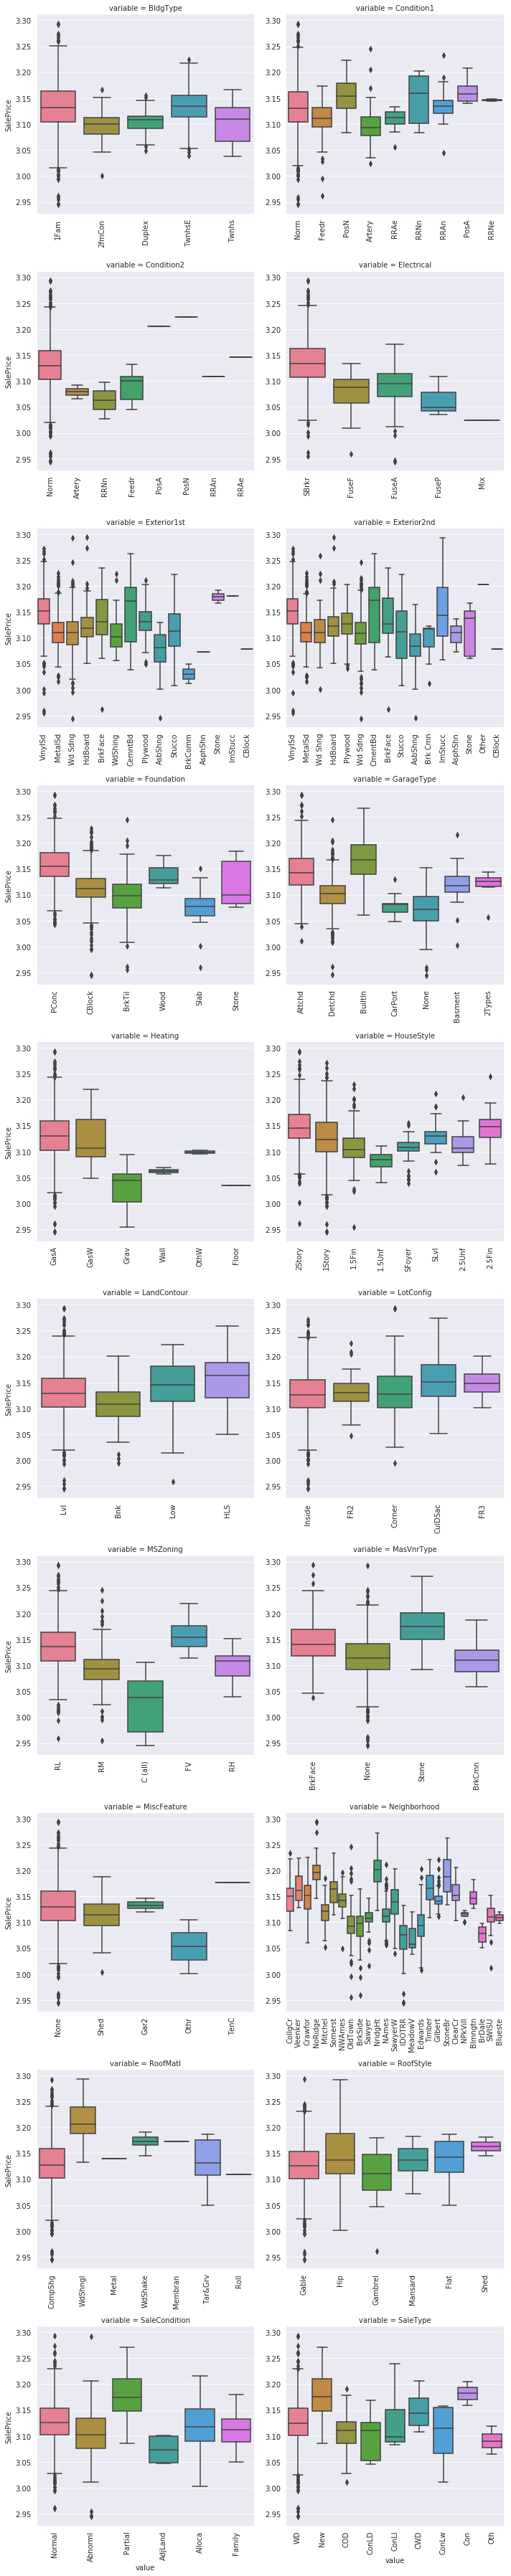

In [24]:
#Visualizing categorical features
categorical_features = data.select_dtypes(include=[np.object])
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, palette='husl')
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

There are some outliers in this data as well, but we are not going to remove these ones too because we don't want our data biased and our models affected by that bias. So we'll keep them and use RobustScaler to make our models robust on them

In [25]:
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 78)


In [26]:
#Check remaining missing values if any 
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


In [27]:
#Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [28]:
data = pd.get_dummies(data)
print(data.shape)

(2917, 220)


In [29]:
train = data[:ntrain]
test = data[ntrain:]

And we're done with data cleaning and feature engineering 

**Models**

In [30]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

We are going to use regularized linear models (Lasso, ElasticNet and KernelRidge) to avoid the risk of overfitting

In [31]:
#Using cross_val_score and shuffling the data
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    #The score which needs to be minimized is negated
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [32]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [33]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1126 (0.0075)



In [34]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [35]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1126 (0.0076)



In [36]:
KRR = KernelRidge(alpha=0.8, kernel='polynomial', degree=2, coef0=3.5)

In [37]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1147 (0.0075)



Let's add GradientBoosting, XGB abd LightGB models to see if the score can get improved

In [38]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=2, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=42)

In [39]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1149 (0.0057)



In [40]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5604, gamma=0.0578, 
                             learning_rate=0.05, max_depth=2, 
                             min_child_weight=1.7817, n_estimators=900,
                             reg_alpha=0.4765, reg_lambda=0.9173,
                             subsample=0.4738, silent=1,
                             random_state =42, nthread = -1)

In [41]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1179 (0.0047)



In [42]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [43]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1155 (0.0071)



In [44]:
#Averaging models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    #Defining clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        #Training cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    #Doing the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [45]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1089 (0.0072)



The score has been improved

In [46]:
#Adding a meta-model and stacking averaged models
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    #Fitting the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        #Training cloned base models then creating out-of-fold predictions
        #that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        #Training the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
     #Doing the predictions of all base models on the test data and using the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [47]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1089 (0.0070)


Now we'll add XGB and LightGBM to the StackedRegressor

In [48]:
#Difining a rmsle evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [49]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.09017570390758231


In [50]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.09242220116554119


In [51]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07278804996373617


In [52]:
'''RMSE on the entire Train data when averaging'''
print('RMSLE score on train data:')
#Weighted average
print(rmsle(y_train,stacked_train_pred*0.5 +
               xgb_train_pred*0.1 + lgb_train_pred*0.4 ))

RMSLE score on train data:
0.08131592029418737


In [53]:
ensemble = stacked_pred*0.5 + xgb_pred*0.1 + lgb_pred*0.4

In [54]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

**References:**

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard